#Лабораторна робота №3. Дослiдження варiантiв архiтектур згроткових нейронних мереж

**Виконала** студентка групи КІ-41мп Додонова Марія

**Мета:** Вивчення iснуючих варiантiв архiтектур згорткових нейронних мереж та їх порiвняння.

## Порядок виконання

1. Обрати фреймворк для виконання роботи: tensorflow чи pytorch.

2. Взяти задачу i вiдповiдний датасет з 2-ї лабораторної роботи.

3. Завантажити, виконати попередню обробку та роздiлити датасет на тренувальну, валiдацiйну та тестову вибiрки.

4. Реалiзувати з нуля 2 вiдомi архiтектури для вирiшення задачi класи-
фiкацiї/регресiї:

* VGGNet;
* Inception (v1-v4);
* Inception-ResNet-v2;
* ResNet;
* Xception;
* Будь-яку iншу за посиланням.

Пiд реалiзацiєю з нуля розумiється використання готових шарiв (Conv2d, MaxPool2d та iншi) з вiдповiдних бiблiотек/фреймворкiв.

5. Навчити побудованi мережi на завантаженому датасетi. Дуже рекомендується навчати моделi на GPU. Якщо у вас немає CUDA-сумiсної вiдеокарти, використовуйте Google Colab.

6. Побудувати графiки навчання (loss та точнiсть) мережi на тренувальнiй на валiдацiйнiй вибiрках. Проаналiзувати отриманi результати, виконати порiвняння моделей мiж собою та з моделлю з попередньої роботи, зробити висновки.


## Виконання роботи

### 1. Обрати фреймворк для виконання роботи: tensorflow чи pytorch.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

In [3]:
params = {
    "batch_size": 64,
    "lr": 0.001,
    "epochs": 10
}

### 2. Взяти задачу i вiдповiдний датасет з 2-ї лабораторної роботи.

### 3. Завантажити, предобробити та роздiлити датасет на тренувальну, валiдацiйну та тестову вибiрки.

In [4]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # mean=0.5 and std=0.5
])

train_dataset = datasets.FashionMNIST(
    "..\\data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.FashionMNIST(
    root="..\\data",
    train=False,
    download=True,
    transform=transform
)

train_dataset, val_dataset = random_split(train_dataset, [0.8, 0.2])

In [6]:
train_loader = DataLoader(train_dataset, batch_size=params["batch_size"], shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=params["batch_size"], shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=params["batch_size"], shuffle=False, num_workers=4)

### 4. Реалiзувати з нуля 2 вiдомi архiтектури для вирiшення задачi класи- фiкацiї/регресiї:

* VGGNet;
* Inception (v1-v4);
* Inception-ResNet-v2;
* ResNet;
* Xception;
* Будь-яку iншу за посиланням.

Пiд реалiзацiєю з нуля розумiється використання готових шарiв (Conv2d, MaxPool2d та iншi) з вiдповiдних бiблiотек/фреймворкiв.

In [7]:
class VGGNet(nn.Module):

  def __init__(self):
    super(VGGNet, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(128, 256, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(256, 512, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(512, 512, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(512, 512, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(512, 512, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(1 * 1 * 512, 4096),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(4096, 10)
    )

  def forward(self, x):
    x = self.features(x)
    x = self.classifier(x)
    return x

In [8]:
class ResBlock(nn.Module):

  def __init__(self, in_channels, out_channels, stride=1):
    super(ResBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
    self.bn1 = nn.BatchNorm2d(out_channels)
    self.relu = nn.ReLU()

    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(out_channels)

    self.skip = nn.Sequential()
    if stride != 1 or in_channels != out_channels:
      self.skip = nn.Sequential(
          nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
          nn.BatchNorm2d(out_channels)
      )

  def forward(self, x):
    identity = self.skip(x)

    output = self.conv1(x)
    output = self.bn1(output)
    output = self.relu(output)

    output = self.conv2(output)
    output = self.bn2(output)

    output += identity
    output = self.relu(output)

    return output


class ResNet(nn.Module):

  def __init__(self):
    super(ResNet, self).__init__()
    self.initial = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    )

    self.layer1 = self.make_layer(64, 64, 2, stride=1)
    self.layer2 = self.make_layer(64, 128, 2, stride=2)
    self.layer3 = self.make_layer(128, 256, 2, stride=2)
    self.layer4 = self.make_layer(256, 512, 2, stride=2)

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(512, 10)
    )

  def make_layer(self, in_channels, out_channels, num_blocks, stride):
    layers = []
    layers.append(ResBlock(in_channels, out_channels, stride))
    for _ in range(1, num_blocks):
      layers.append(ResBlock(out_channels, out_channels))
    return nn.Sequential(*layers)

  def forward(self, x):
    x = self.initial(x)

    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)

    x = self.classifier(x)

    return x

### 5. Навчити побудованi мережi на завантаженому датасетi. Дуже рекомендується навчати моделi на GPU. Якщо у вас немає CUDA-сумiсної вiдеокарти, використовуйте Google Colab.


In [9]:
def train(model, optimizer, criterion, device="cpu"):
  model = model.to(device)
  model.train()
  running_loss = 0.0
  correct, total = 0, 0

  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  train_loss = running_loss / len(train_loader)
  train_accuracy = correct / total

  return train_loss, train_accuracy


def validate(model, optimizer, criterion, device="cpu"):
  model = model.to(device)
  model.eval()
  running_loss = 0.0
  correct, total = 0, 0

  with torch.no_grad():
    for images, labels in val_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)

      running_loss += loss.item()

      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  val_loss = running_loss / len(val_loader)
  val_accuracy = correct / total

  return val_loss, val_accuracy

In [10]:
# Set device and criterion

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()

print(f"Using device: {device}")

Using device: cuda


In [11]:
# Create and train VGGNet

vgg_model = VGGNet()
vgg_optimizer = optim.Adam(vgg_model.parameters(), lr=params["lr"])

vgg_train_losses, vgg_train_accuracies = [], []
vgg_val_losses, vgg_val_accuracies = [], []

print("Training VGGNet:")
for epoch in range(params["epochs"]):
  train_loss, train_accuracy = train(vgg_model, vgg_optimizer, criterion, device)
  val_loss, val_accuracy = validate(vgg_model, vgg_optimizer, criterion, device)

  vgg_train_losses.append(train_loss)
  vgg_train_accuracies.append(train_accuracy)
  vgg_val_losses.append(val_loss)
  vgg_val_accuracies.append(val_accuracy)

  print(f"Epoch [{epoch+1}/{params['epochs']}]: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f},", \
        f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}.")

print("Finished Training!")

Training VGGNet:
Epoch [1/10]: Train Loss: 0.8325, Val Loss: 0.4405, Train Accuracy: 0.6668, Val Accuracy: 0.8451.
Epoch [2/10]: Train Loss: 0.4032, Val Loss: 0.3587, Train Accuracy: 0.8585, Val Accuracy: 0.8720.
Epoch [3/10]: Train Loss: 0.3336, Val Loss: 0.3124, Train Accuracy: 0.8833, Val Accuracy: 0.8877.
Epoch [4/10]: Train Loss: 0.2988, Val Loss: 0.2920, Train Accuracy: 0.8988, Val Accuracy: 0.8930.
Epoch [5/10]: Train Loss: 0.2774, Val Loss: 0.2999, Train Accuracy: 0.9043, Val Accuracy: 0.8913.
Epoch [6/10]: Train Loss: 0.2540, Val Loss: 0.3182, Train Accuracy: 0.9133, Val Accuracy: 0.8924.
Epoch [7/10]: Train Loss: 0.2384, Val Loss: 0.2885, Train Accuracy: 0.9176, Val Accuracy: 0.8999.
Epoch [8/10]: Train Loss: 0.2225, Val Loss: 0.2883, Train Accuracy: 0.9233, Val Accuracy: 0.9020.
Epoch [9/10]: Train Loss: 0.2107, Val Loss: 0.2874, Train Accuracy: 0.9261, Val Accuracy: 0.9046.
Epoch [10/10]: Train Loss: 0.2117, Val Loss: 0.3055, Train Accuracy: 0.9265, Val Accuracy: 0.9002.
Fi

In [12]:
# Create and train ResNet

resnet_model = ResNet()
resnet_optimizer = optim.Adam(resnet_model.parameters(), lr=params["lr"])

resnet_train_losses, resnet_train_accuracies = [], []
resnet_val_losses, resnet_val_accuracies = [], []

print("Training ResNet:")
for epoch in range(params["epochs"]):
  train_loss, train_accuracy = train(resnet_model, resnet_optimizer, criterion, device)
  val_loss, val_accuracy = validate(resnet_model, resnet_optimizer, criterion, device)

  resnet_train_losses.append(train_loss)
  resnet_train_accuracies.append(train_accuracy)
  resnet_val_losses.append(val_loss)
  resnet_val_accuracies.append(val_accuracy)

  print(f"Epoch [{epoch+1}/{params['epochs']}]: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f},", \
        f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}.")

print("Finished Training!")

Training ResNet:
Epoch [1/10]: Train Loss: 0.4551, Val Loss: 0.3291, Train Accuracy: 0.8340, Val Accuracy: 0.8796.
Epoch [2/10]: Train Loss: 0.3183, Val Loss: 0.3863, Train Accuracy: 0.8828, Val Accuracy: 0.8672.
Epoch [3/10]: Train Loss: 0.2820, Val Loss: 0.2901, Train Accuracy: 0.8943, Val Accuracy: 0.8944.
Epoch [4/10]: Train Loss: 0.2561, Val Loss: 0.2914, Train Accuracy: 0.9060, Val Accuracy: 0.8922.
Epoch [5/10]: Train Loss: 0.2315, Val Loss: 0.2794, Train Accuracy: 0.9140, Val Accuracy: 0.8988.
Epoch [6/10]: Train Loss: 0.2114, Val Loss: 0.2512, Train Accuracy: 0.9213, Val Accuracy: 0.9072.
Epoch [7/10]: Train Loss: 0.1997, Val Loss: 0.2653, Train Accuracy: 0.9258, Val Accuracy: 0.9043.
Epoch [8/10]: Train Loss: 0.1830, Val Loss: 0.2467, Train Accuracy: 0.9323, Val Accuracy: 0.9110.
Epoch [9/10]: Train Loss: 0.1743, Val Loss: 0.2559, Train Accuracy: 0.9355, Val Accuracy: 0.9099.
Epoch [10/10]: Train Loss: 0.1520, Val Loss: 0.2556, Train Accuracy: 0.9432, Val Accuracy: 0.9124.
Fi

### 6. Побудувати графiки навчання (loss та точнiсть) мережi на тренувальнiй на валiдацiйнiй вибiрках. Проаналiзувати отриманi результати, виконати порiвняння моделей мiж собою та з моделлю з попередньої роботи, зробити висновки.

In [13]:
def plot(model, train_losses, val_losses, train_accuracies, val_accuracies):
  plt.figure(figsize=(10, 3))

  # Loss Curve
  plt.subplot(1, 2, 1)
  plt.plot(train_losses, label="Train Loss")
  plt.plot(val_losses, label="Validation Loss")
  plt.title(f"{model} Loss Curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()

  # Accuracy Curve
  plt.subplot(1, 2, 2)
  plt.plot(train_accuracies, label="Train Accuracy")
  plt.plot(val_accuracies, label="Validation Accuracy")
  plt.title(f"{model} Accuracy Curve")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()

  plt.show()

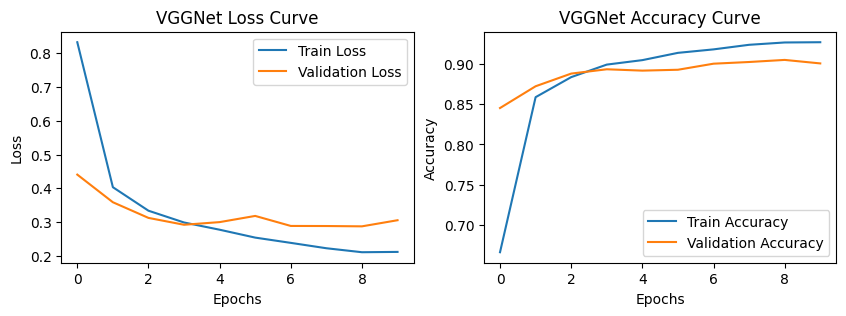

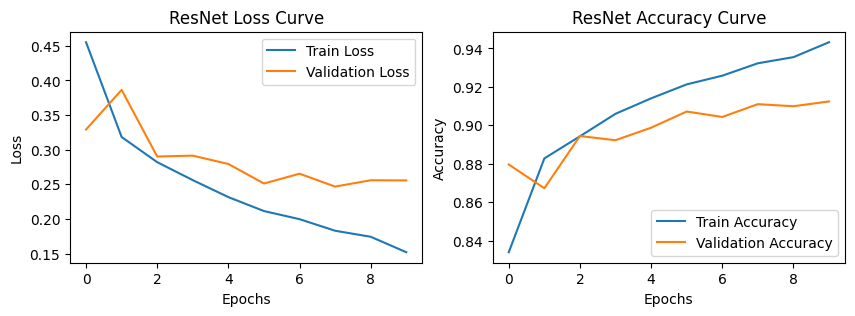

In [14]:
plot(
    "VGGNet",
    vgg_train_losses,
    vgg_val_losses,
    vgg_train_accuracies,
    vgg_val_accuracies
)
plot(
    "ResNet",
    resnet_train_losses,
    resnet_val_losses,
    resnet_train_accuracies,
    resnet_val_accuracies
)

## Висновок

В ході виконання роботи було завантажено, передоброблено та розділено датасет FashionMNIST на тренувальну, валідаційну та тестову вибірки, реалізовано архітектури згорткових нейронних мереж VGGNet та ResNet. Було навчено мережі на завантаженому датасеті з використанням різних гіперпараметрів та побудовано графіки навчання мереж.

Проаналізувавши графіки loss та accuracy для різних мереж VGGNet та ResNet, можна зробити висновок, що ResNet демонструє найкращі результати завдяки своїй здатності уникати проблеми затухання градієнтів. Вона досягає найвищої точності на навчальній і валідаційній вибірках (94.1% і 91.9% відповідно) та має найнижчу валідаційну втрату. VGGNet поступається ResNet у точності, проте є гарним вибором для задач середньої складності, забезпечуючи стабільне узагальнення. Мережа LeNet, розглянута у попередній роботі, показує найгірші результати серед трьох мереж через свою простоту, але залишається ефективною для задач із низькою обчислювальною складністю.